In [2]:
import pandas as pd
import numpy as np

breeds = pd.read_csv('breed_labels.csv')
colors = pd.read_csv('color_labels.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')
states = pd.read_csv('state_labels.csv')

# train['dataset_type'] = 'train'
# test['dataset_type'] = 'test'

In [3]:
train.head(10)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
5,2,NaN,3,266,0,2,5,6,0,2,...,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2
6,2,BULAT,12,264,264,1,1,0,0,2,...,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,...,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3
8,2,NaN,2,265,0,2,6,0,0,2,...,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1
9,2,Kitty,12,265,0,2,1,7,0,2,...,1,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


In [15]:
train['AdoptionSpeed'].value_counts()
nameCounts = train['Name'].value_counts()
namePops =  pd.Series()
for name in train['Name']:
    namePops.append(pd.Series(nameCounts[name])

train["NamePopularity"] = namePops 

    


SyntaxError: invalid syntax (<ipython-input-15-28e79690b2b5>, line 7)

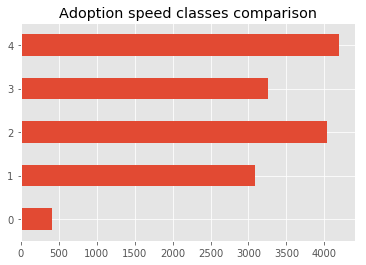

In [14]:
train['AdoptionSpeed'].value_counts().sort_index().plot('barh')
plt.title('Adoption speed classes comparison');

(array([1.790e+02, 2.304e+03, 3.503e+03, 1.966e+03, 1.109e+03, 5.950e+02,
        5.580e+02, 2.810e+02, 3.090e+02, 1.840e+02, 1.620e+02, 9.400e+01,
        9.670e+02, 4.000e+01, 7.600e+01, 7.900e+01, 5.000e+01, 6.700e+01,
        1.650e+02, 2.600e+01, 3.200e+01, 2.800e+01, 1.900e+01, 8.000e+00,
        6.510e+02, 1.000e+01, 1.300e+01, 1.700e+01, 1.300e+01, 2.500e+01,
        5.200e+01, 9.000e+00, 1.500e+01, 4.000e+00, 5.000e+00, 3.000e+00,
        4.170e+02, 7.000e+00, 8.000e+00, 7.000e+00, 2.000e+00, 1.000e+01,
        2.200e+01, 1.000e+00, 1.000e+00, 2.000e+00, 5.000e+00, 2.000e+00,
        2.410e+02, 6.000e+00, 8.000e+00, 7.000e+00, 4.000e+00, 8.000e+00,
        1.500e+01, 6.000e+00, 3.000e+00, 2.000e+00, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 5

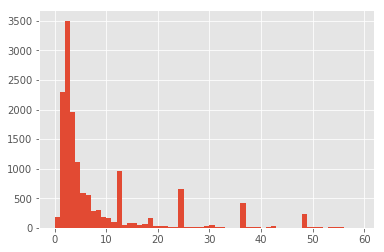

In [15]:
plt.hist(train['Age'],bins=list(range(0,60,1)))

In [7]:
import random
        


    
train.loc[train.Age % 12 == 0 && train, 'Age'] += 




    

(array([0.000e+00, 2.304e+03, 3.503e+03, 1.966e+03, 1.109e+03, 5.950e+02,
        5.580e+02, 2.810e+02, 3.090e+02, 1.840e+02, 1.620e+02, 9.400e+01,
        0.000e+00, 4.000e+01, 7.600e+01, 7.900e+01, 5.000e+01, 6.700e+01,
        1.650e+02, 2.600e+01, 3.200e+01, 2.800e+01, 1.900e+01, 8.000e+00,
        0.000e+00, 1.000e+01, 1.300e+01, 1.700e+01, 1.300e+01, 2.500e+01,
        5.200e+01, 9.000e+00, 1.500e+01, 4.000e+00, 5.000e+00, 3.000e+00,
        0.000e+00, 7.000e+00, 8.000e+00, 7.000e+00, 2.000e+00, 1.000e+01,
        2.200e+01, 1.000e+00, 1.000e+00, 2.000e+00, 5.000e+00, 2.000e+00,
        0.000e+00, 6.000e+00, 8.000e+00, 7.000e+00, 4.000e+00, 8.000e+00,
        1.500e+01, 6.000e+00, 3.000e+00, 2.000e+00, 2.976e+03]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 5

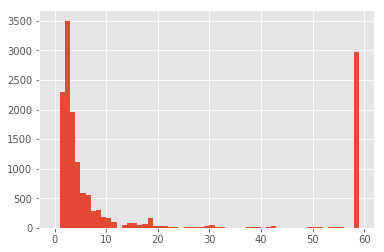

In [9]:
plt.hist(train['Age'],bins=list(range(0,60,1)))

NameError: name 'train' is not defined

TypeError: 'builtin_function_or_method' object is not iterable